Data Cleaning means fixing bad data in your dataset.                                                                         
Bad Data could be:
Empty cells, 
Data in wrong format, 
Wrong Data, and 
Duplicates

# Cleaning Empty cells

In [1]:
import pandas as pd

C:\Users\MY PC\AppData\Local\Temp\ipykernel_1720\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('data.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [22]:
print(df.duplicated())
# df.drop_duplicates(inplace=True) 
# it will make sure , that after dropping duplicates new dataframe is not created

0      False
1      False
2      False
3      False
4      False
       ...  
164    False
165    False
166    False
167    False
168    False
Length: 169, dtype: bool


In [3]:
import missingno as mso # it is a library to visualize missing data

<Axes: >

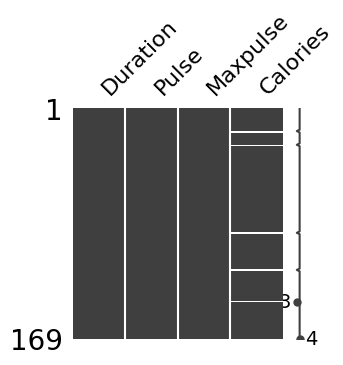

In [4]:
mso.matrix(df,figsize=(3,3))

# Remove rows


In [5]:
# Remove rows which have empty cells
# use .dropna(), it gives new df and does not change original one

new_df=df.dropna()

<Axes: >

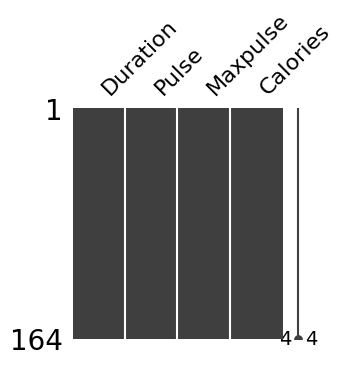

In [6]:
mso.matrix(new_df,figsize=(3,3))

In [7]:
# df.dropna(inplace=True) # now dropna() will modify original df

<Axes: >

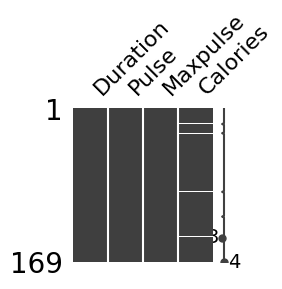

In [8]:
mso.matrix(df,figsize=(2,2))

# Replace Empty Values

In [9]:
# Use fillna(). this method allows us to replace empty cells with a value

In [10]:
# df.fillna(1000,inplace=True)

In [11]:
for val in df['Calories']:
    if val==1000:
        print(val)

In [12]:
# Replace only for Specified Columns
# df['Calories'].fillna(-1000,inplace=True) # inplace will not work in pandas 3.0
# df.fillna({'Calories:130'},inplace=True)
# df['Calories']=df['Calories'].fillna(130)

# Replacing values with Mean, Median and Mode

In [13]:
print(df['Calories'].mean())

375.79024390243904


In [14]:
df['Calories']=df['Calories'].fillna(df['Calories'].mean())

In [15]:
for val in df['Calories']:
    if val==375.79024390243904:
        print(True)

True
True
True
True
True


In [16]:
print(df['Calories'].median())

321.0


In [17]:
df['Calories']=df['Calories'].fillna(df['Calories'].median())

In [18]:
print(df['Calories'].mode())

0    300.0
Name: Calories, dtype: float64


In [19]:
df['Calories']=df['Calories'].fillna(df['Calories'].mode())

# Cleaning Wrong Format

In [20]:
# Cells with data of worng format can make it difficult, or even impossible, to analyze data. 
# To fix it, you have two options: remove the rows, or convert all cells in the column into same format.

In [ ]:
for d in df['Date']:
    print(type(d))

In [ ]:
# Convert all cells in same format
df['Date']=pd.to_datetime(df['Date'])
df.to_string()

In [ ]:
# Remove rows
# Remove rows with a Null value in Date Column.

df.dropna(subset=['Date'],inplace=True)

# Fixing Wrong Data

In [ ]:
# Wrong Data does not have to be empty cells or wrong format.
# It can just be wrong, like if someone registered '199' instead of '1.99'  

#  df.iloc[7]['Duration']=450 - this will make a temporary changes

df.loc[7,'Duration']=450 # this will make permanent changes in original dataframe
df.loc[8,'Duration']=1000

for val in df['Duration']:
    if val==450:
        print(True)

True


In [ ]:
df.head(10)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,450,104,134,253.3
8,1000,109,133,195.1
9,60,98,124,269.0


In [ ]:
# 1st way to Handle WRONG DATA
df.loc[8,'Duration']=35

In [ ]:
df.head(10)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,450,104,134,253.3
8,35,109,133,195.1
9,60,98,124,269.0


In [ ]:
# 2nd way - Remove rows which have wrong data
for x in df.index: # x - index 0,1,2,3....
    if df.loc[x,'Duration']==450:
        df.drop(x,inplace=True)

0
1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


In [ ]:
df.head(10)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
8,35,109,133,195.1
9,60,98,124,269.0
10,60,103,147,329.3


# Remove Duplicates

In [23]:
# df.duplicated()
# df.drop_duplicates(inplace=True)